[*********************100%***********************]  1 of 1 completed


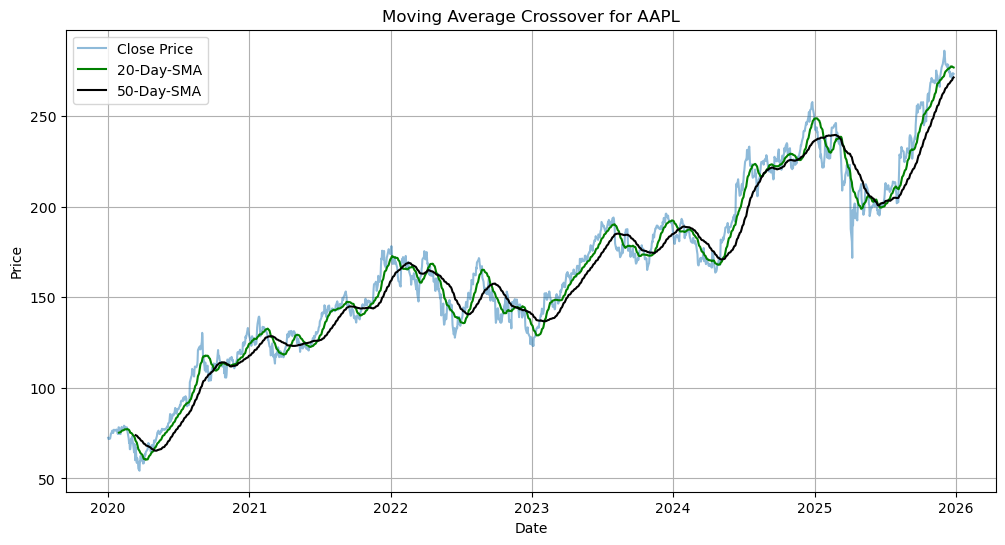

[*********************100%***********************]  1 of 1 completed


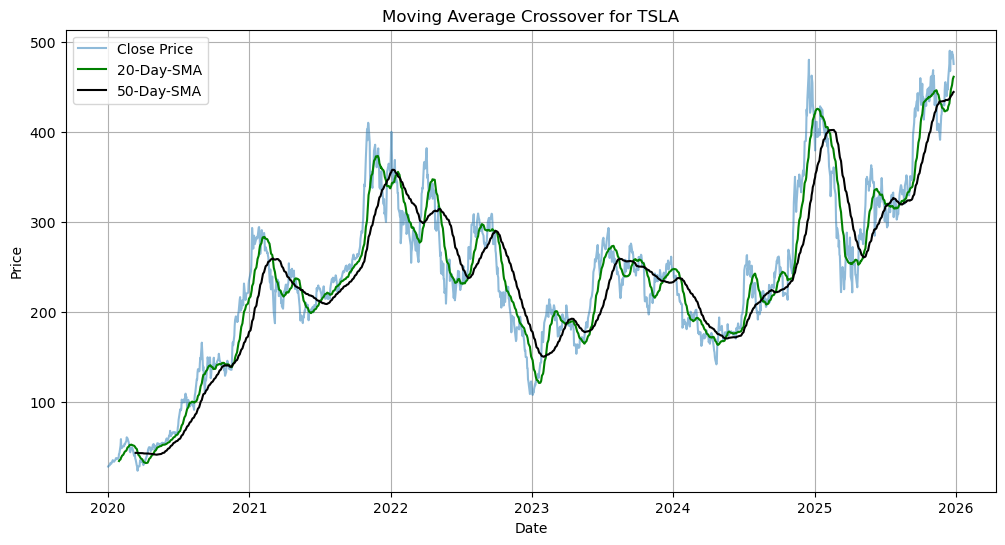

[*********************100%***********************]  1 of 1 completed


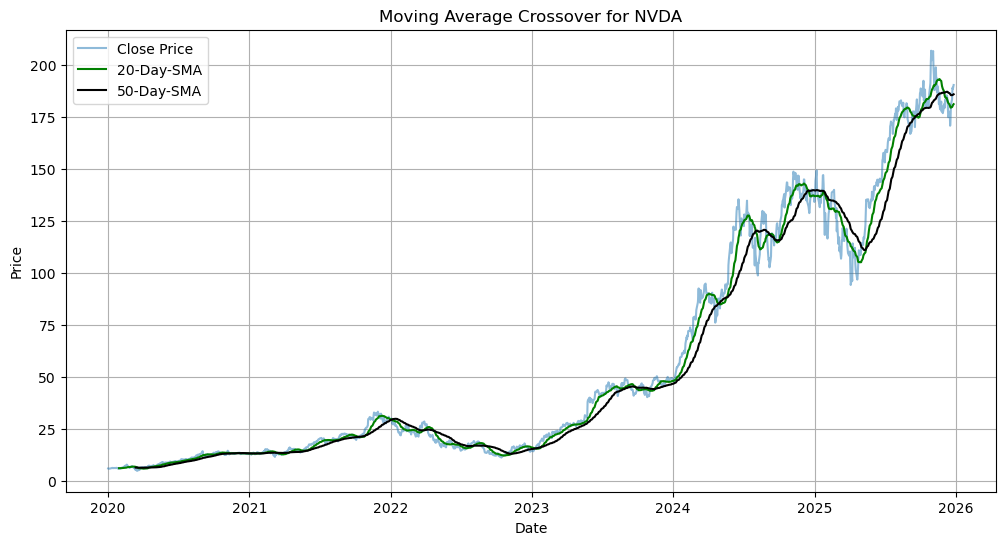

[*********************100%***********************]  1 of 1 completed


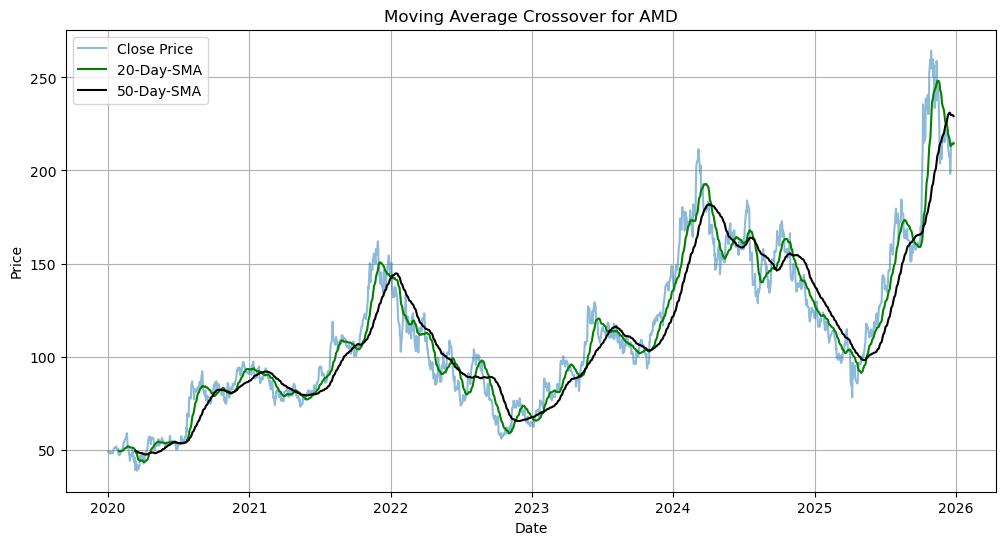

[*********************100%***********************]  1 of 1 completed


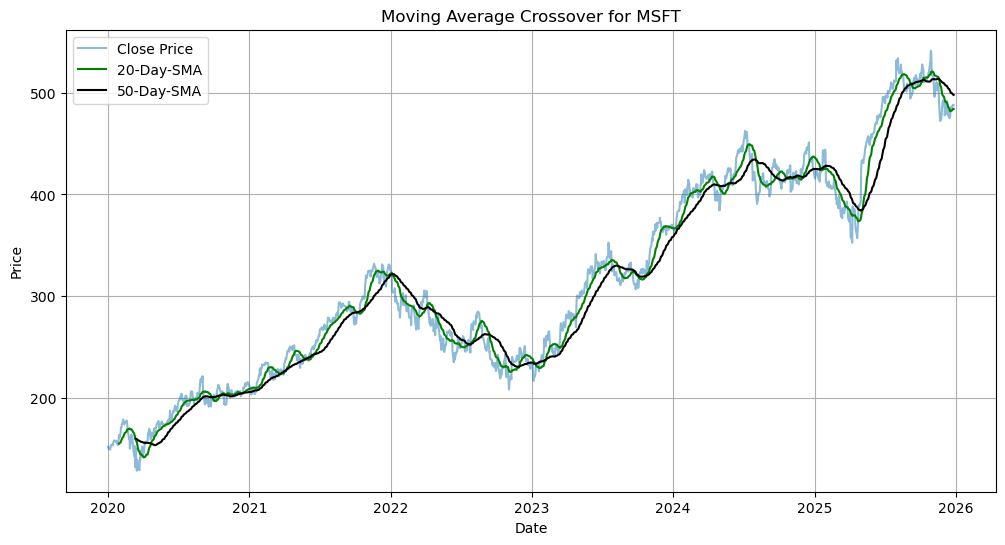

--SHARP RATIO SCOREBOARD--
AAPL:0.37
TSLA:0.06
NVDA:1.13
AMD:0.47
MSFT:0.45


In [25]:
import pandas as pd
import yfinance as yf
import numpy as np

stocks = ['AAPL','TSLA','NVDA','AMD','MSFT']
results = {}
for ticker in stocks:
    df = yf.download(ticker, start = '2020-01-01', end = '2025-12-27')
    df.columns = df.columns.get_level_values(0)
    df['SMA20'] = df['Close'].rolling(window=(20)).mean()
    df['SMA50'] = df['Close'].rolling(window=(50)).mean()
    df['SMA200'] = df['Close'].rolling(window=(200)).mean()

    df['Signal'] = 0
    df.loc[(df['SMA20']>df['SMA50']) & (df['Close'] > df['SMA200']), 'Signal'] = 1

    df['Returns'] = df['Close'].pct_change()
    df['Stretegy'] = df['Signal'].shift(1) * df['Returns']

    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5)
    plt.plot(df.index, df['SMA20'], label = '20-Day-SMA',color='green')
    plt.plot(df.index, df['SMA50'], label = '50-Day-SMA', color= 'black')
    plt.title(f'Moving Average Crossover for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()
        
    daily_mean = df['Stretegy'].mean()
    daily_std = df['Stretegy'].std()
    sharp = (daily_mean / daily_std) * np.sqrt(252)

    results[ticker] = round(sharp, 2)
print("--SHARP RATIO SCOREBOARD--")

for ticker,score in results.items():
    print(f"{ticker}:{score}")